In [23]:
from matplotlib import pyplot as plt
import numpy as np

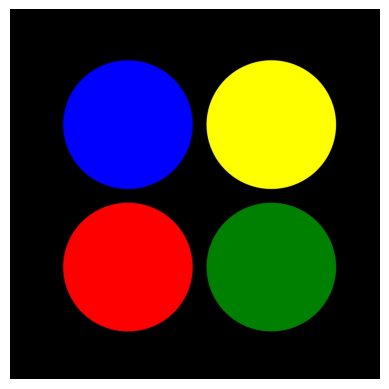

In [24]:
img = plt.imread('four-circles.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [25]:
#showing how this image is stored in img
print(f'{type(img)=}', f'{img.shape=}')

#image is stored as multi-dimensional in a numpy array, where there are 3 1000 x 1000 numpy arrays, containing information about RGB channels

type(img)=<class 'numpy.ndarray'> img.shape=(1000, 1000, 3)


In [26]:
print(f'{type(img[0,0,0])=}')

#stored as 8-but unsigned integer. unsigned = positive numbers from 0 to 2^8 - 1 = 255

type(img[0,0,0])=<class 'numpy.uint8'>


Text(0.5, 1.0, 'Blue Channel(in Grayscale)')

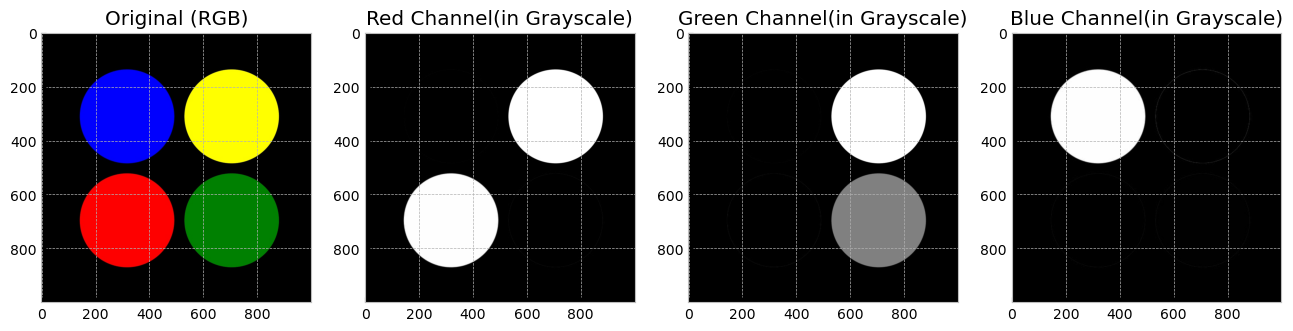

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

ax_original, ax_red, ax_green, ax_blue = ax #reassigning the axes

ax_original.imshow(img)
ax_original.set_title('Original (RGB)')

# ALL row & ALL columns of layer 0
ax_red.imshow(img[:, :, 0], cmap='gray') #cmap='gray' means gray scale
ax_red.set_title('Red Channel(in Grayscale)') #will see R and Y, R+G = yellow

# ALL row & ALL columns of layer 1
ax_green.imshow(img[:, :, 1], cmap='gray')
ax_green.set_title('Green Channel(in Grayscale)') #will see G and Y, R+G = yellow

# ALL row & ALL columns of layer 2
ax_blue.imshow(img[:, :, 2], cmap='gray')
ax_blue.set_title('Blue Channel(in Grayscale)')

#notice how the layers are stored sequentially as R G B
#colour scales: https://matplotlib.org/stable/users/explain/colors/colormaps.html#overview

Text(0.5, 1.0, 'Blue values')

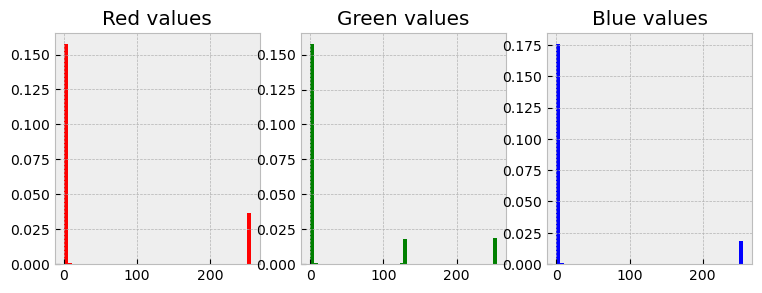

In [28]:
plt.style.use('bmh') #Histogram

# Convert the 2D array to a long 1D list using 'flatten'. Sequentially ch0-2 are R G B
r_data = img[:, :, 0].flatten()
g_data = img[:, :, 1].flatten()
b_data = img[:, :, 2].flatten()

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
ax_red, ax_green, ax_blue = ax

ax_red.hist(r_data, color='red', bins=50, density=True) #bins is thickness of the bars
ax_red.set_title('Red values')

ax_green.hist(g_data, color='green', bins=50, density=True)
ax_green.set_title('Green values')

ax_blue.hist(b_data, color='blue', bins=50, density=True)
ax_blue.set_title('Blue values')

#most values lie on 0 which is logical as most of the image are empty. rightmost peak is true RGB colour value
#middle peak in green channel represents low-intensity green to make up yellow

In [29]:
n = 5
my_array = np.zeros((3, n, n), dtype='uint8')

for layer in range(3):
    for i in range(n):
        my_array[layer, i, :] = 2**layer*i

# 1. Replace all values =<2 with 0 in all the layers.
mask = my_array <= 2
my_array[mask] = 0

# 2. Replace all values =>12 with 16 in all the layers.
mask = my_array >= 12
my_array[mask] = 16

# 3. Replace all values of layer 1 to 0.
my_array[1, :, :] = 0

# 4. Replace all non-zero values of **only** layer 0 with 4.
mask = my_array[0, :, :] != 0 #if my_array in layer 0 is NOT =0, put it in variable 'mask'
my_array[0, mask] = 4 #in layer 0, return whatever's in 'mask' and replace it with 4

# 5. Replace all values =>16 of **only** layer 2 with 8.
mask = my_array[2, :, :] >= 16
my_array[2, mask] = 8

# 6. Multiply layer 0 with layer 2 and make it equal to layer 1
my_array[1] = my_array[0, :, :]*my_array[2, :, :]

# 7. Identify the locations where there is overlap between layer 0
# and layer 1. (i.e. where both are non-zero). Make all these values equal 3.
mask = (my_array[0] != 0) & (my_array[1] != 0)
my_array[0, mask] = 3
my_array[1, mask] = 3